<img src="https://www.analyticsvidhya.com/wp-content/themes/Curated/custom-design/images/logo.png" width=240 height= 240 align="right"/>

# Text Classification using nltk, spaCy, and Scikit-learn

“Text Classification” is one of the most important NLP tasks. It is the process of classifying text strings or documents into different categories, based upon the contents of the strings. Some examples of text classification are:


### Table of Contents

1. Understand the Problem Statement
2. Read Dataset
3. Clean and Pre-Process Text
4. Split Data
4. Extracting Features from Cleaned Text
5. Model Building

<br>

### Understand the Problem Statement

A movie review is a widely used means for movie critics to assess a film’s overall quality and determine
whether or not they think the film is worth watching. In this project, our task is to classify these IMDb movie reviews into 'positive' and 'negative' reviews. 

### Read Dataset

Let's import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import nltk
import spacy
from tqdm import tqdm
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

There are two folders named "positive" and "negative" containing text files of positive and negative movie reviews, respectively. We will have to first read and load the contents of these text files (reviews) to move ahead with our analysis.

In [2]:
# load file names
pos_files = os.listdir("positve/")
neg_files = os.listdir("negative/")

In [3]:
print(pos_files[:10])

['2768_8.txt', '43_10.txt', '2956_8.txt', '6408_10.txt', '1223_7.txt', '7041_7.txt', '6380_9.txt', '3787_10.txt', '11005_10.txt', '10085_10.txt']


In [4]:
print(neg_files[:10])

['619_1.txt', '3185_3.txt', '1731_3.txt', '2607_1.txt', '11458_3.txt', '10104_1.txt', '1123_1.txt', '10521_1.txt', '10815_2.txt', '561_1.txt']


...................................................................................................................

Let's see how many negative and postive reviews are there.

In [5]:
len(pos_files), len(neg_files)

(10000, 8000)

So, there are 10,000 positive reviews and 8,000 negative reviews. Till now we have just gathered the names of files that we have to read. To read them, let's define a function.

In [6]:
# function to read text files
def read_review(filename):
    # open the file as read only
    file = open(filename, mode='rt', encoding='utf-8')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [7]:
# read and store positive reviews in a list
pos = []

for i in pos_files:
    pos.append(read_review("positve/"+i))
    
# read and store negative reviews in a list
neg = []

for i in neg_files:
    neg.append(read_review("negative/"+i))

We will now put both positive and negative reviews in a dataframe. We will also assign 1 to the positive reviews and 0 to the negative reviews.

In [8]:
df = pd.DataFrame({'review':(pos+neg)})

# '1' for positive reviews and '0' for negative reviews
df['class'] = 0
df['class'][:10000] = 1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [9]:
# check class distribution
df['class'].value_counts()

1    10000
0     8000
Name: class, dtype: int64

<br>

### Clean and Pre-Process Text

Cleaning and pre-processing of raw text data is an important step in an NLP task. We try to remove as much noise as possible from the data. Punctuation marks, special characters(#@&<!), and words like 'the', 'a', 'of', 'oh' are of not much use in tasks like text classification, and that is why they are considered as noise. So, before getting started, let's print out a random review.  

In [10]:
df['review'][4]

'about a year and a half ago my dad told me about The French Doors. i thought it sounded interesting enough but i didn\'t try to find it anywhere. Then about a year ago i remembered that film and thought "hey why not" and tried finding it on the internet. eventually after about a week of looking i found it on atom films. i called my dad over to the computer and said to him" hey dad I\'ve found that creepy film you told me about ages ago!" He smiled at me, turned round turned off the lights so it was pitch black apart from the computer screen and told me to watch it. I started off fine...Then when he started getting worried about whatever was there i found it very unnerving. at the end i pushed back my chair and stood up...it made me jump!:P if you haven\'t seen this film i highly recommend you do because it is well worth it. even after the fourth or fifth time its still unsettling.<br /><br />GREAT FILM!'

...................................................................................................................

As you can see, we have lots of punctuation marks and html tags. To get rid of them from the text we will take help of regular expressions. 

In [11]:
replace_1 = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
replace_2 = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

# function to clean text data
def clean_reviews(reviews):
    reviews = [replace_1.sub("", line.lower()) for line in reviews]
    reviews = [replace_2.sub(" ", line) for line in reviews]
    return reviews

In [12]:
df['review'] = clean_reviews(df['review'])

Let's pull out the same review after the cleaning operation.

In [13]:
df['review'][4]

'about a year and a half ago my dad told me about the french doors i thought it sounded interesting enough but i didnt try to find it anywhere then about a year ago i remembered that film and thought hey why not and tried finding it on the internet eventually after about a week of looking i found it on atom films i called my dad over to the computer and said to him hey dad ive found that creepy film you told me about ages ago he smiled at me turned round turned off the lights so it was pitch black apart from the computer screen and told me to watch it i started off finethen when he started getting worried about whatever was there i found it very unnerving at the end i pushed back my chair and stood upit made me jumpp if you havent seen this film i highly recommend you do because it is well worth it even after the fourth or fifth time its still unsettling great film'

...................................................................................................................

It seems pretty neat and free from unwanted elements. Now let's see which are the top most frequent words in the data.

In [14]:
from nltk import FreqDist

In [15]:
# function to plot top n most frequent words
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

      # selecting top n most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

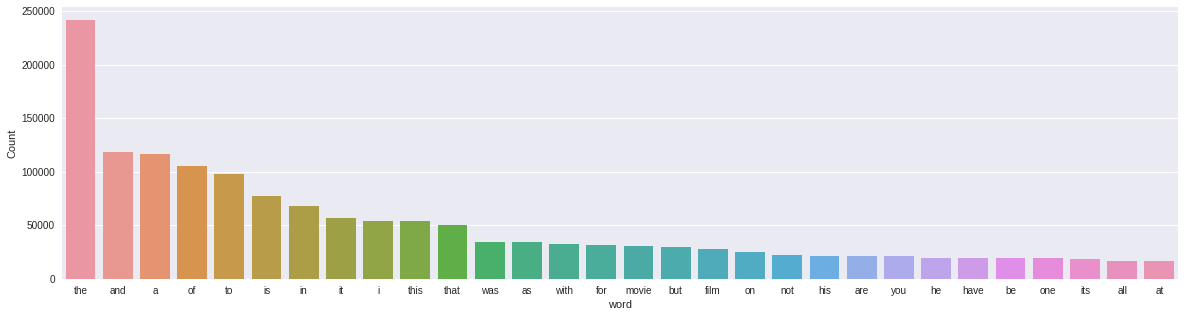

In [16]:
freq_words(df['review'])

As it turns out, terms like 'and', 'a', 'is', that' etc. are the most common terms in our data. Most of them are also known as stopwords in the NLP community, and they would be of little help in identifying a review as positive or negative. Hence, we will get rid of them as well. 

We will use __spaCy library__ here to remove the stopwords.
```python -m spacy download en_core_web_sm```

In [17]:
nlp = spacy.load('en_core_web_sm')

However, there are a few stopwords which should not be removed as their absence might change the meaning of an entire sentence. So, we won't remove the words 'however', 'no', 'not', and 'but'. We will take them off from spaCy's stopwords vocabulary in the following code block.

In [18]:
nlp.vocab['however'].is_stop = False
nlp.vocab['no'].is_stop = False
nlp.vocab['not'].is_stop = False
nlp.vocab['but'].is_stop = False

__Tokenization__

To remove the stopwords, we will have to first tokenize our reviews. Tokenization means splitting a piece of text into its constituent words. For example, the sentence below will be split into a list of tokens/words after tokenization.

__"The cutting edge of the plot is compromised" --> ['The', 'cutting', 'edge', 'of', 'the', 'plot', 'is', 'compromised']__

We will again use spaCy for tokenizaion. First, the raw text is split on whitespace characters, similar to text.split(' '). Then, the tokenizer processes the text from left to right. On each substring, it performs two checks:


In [75]:
# tokenization using spaCy
def tokenization(x):
    reviews_tokens = []
    for i in tqdm(x):
        i = nlp(i)
        temp = []
        for j in i:
            temp.append(j.text)
        reviews_tokens.append(temp)
    
    return reviews_tokens

In [76]:
df['tokenized_review'] = tokenization(df['review'])

100%|██████████| 18000/18000 [18:12<00:00, 16.47it/s]


In [77]:
# function to remove stopwords
def strip_stopwords(reviews):
    s = []
    for r in tqdm(reviews):
        s_2 = []
        for token in r:
            if nlp.vocab[token].is_stop == True:
                continue
            else:
                s_2.append(token)
        s.append(" ".join(s_2))    
        
    return s

Let's remove the stopwords.

In [78]:
df['review_cleaned'] = strip_stopwords(df['tokenized_review'])

100%|██████████| 18000/18000 [00:03<00:00, 5071.48it/s]


We will again check the most common terms in the cleaned review text after eliminating the stopwords.

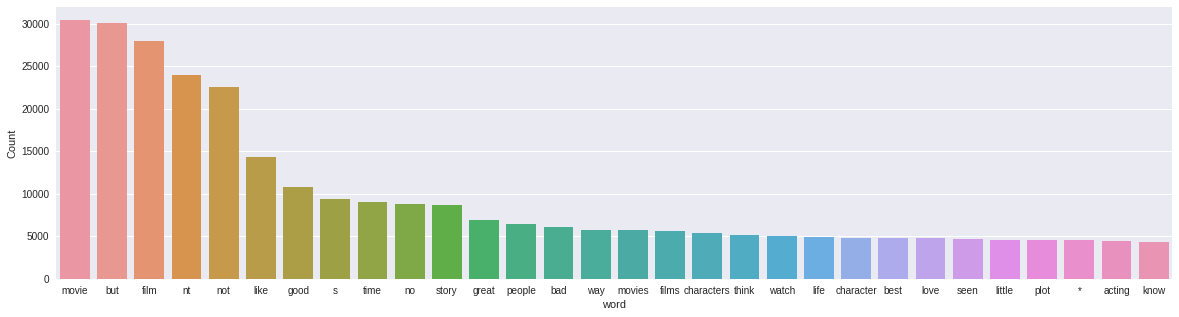

In [79]:
freq_words(df['review_cleaned'])

Now we can see more relevant terms have come up. Words such as 'movie', 'film', 'story', 'character' as most frequently appearing words make sense. However, we can further clean up the data. Let's get rid of single character terms. 

In [80]:
# remove 1 character terms (length == 1)
df['review_cleaned'] = df['review_cleaned'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

One more glance at the top 30 most common words.

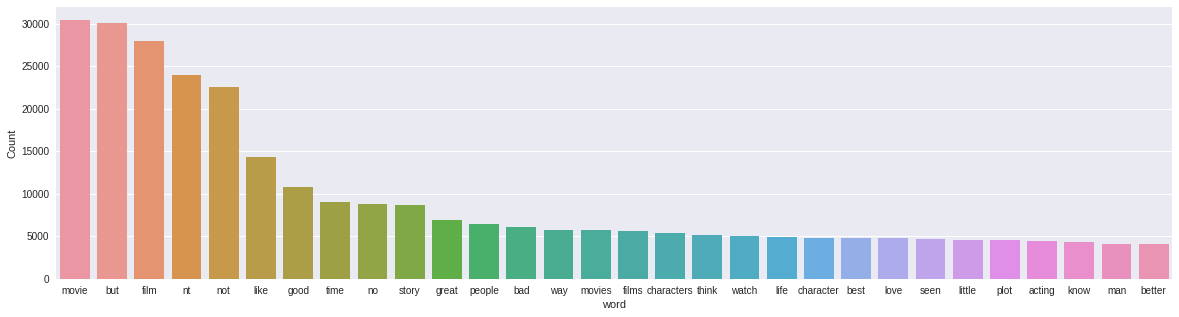

In [81]:
freq_words(df['review_cleaned'])

### Stemming

In [50]:
def stemming_text(text):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()
    return [''.join(stemmer.stem(word) for word in review.split()) for review in text]
df['review_cleaned'] = stemming_text(df['review_cleaned'])

### Lemmatization:

In [60]:
from nltk.stem import WordNetLemmatizer
def lemmatization_text(text):
    lemmatizer = WordNetLemmatizer()
    return [''.join(lemmatizer.lemmatize(word) for word in review.split()) for review in text]
df['review_cleaned'] = lemmatization_text(df['review_cleaned'])

<br>

### Split Data

After cleaning and pre-processing of the reviews, we can now split our data into 3 sets — train, validation, and test — in the ratio of 70%, 15% and 15%, respectively. We will use the train set for traing our model, and validation and test sets to make predictions and evaluate our model.

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# splitting data into train, test, and validation set
train, temp = train_test_split(df, stratify = df['class'], test_size=0.3, random_state=42)

test, val = train_test_split(temp, stratify = temp['class'], test_size=0.5, random_state=42)

In [84]:
train.shape, val.shape, test.shape

((12600, 4), (2700, 4), (2700, 4))

<br>

### Extracting Features from Cleaned Text

Since we will building a classification model, we can't directly feed text data to our model. We will have to extract numerical features from the cleaned text to build our model. We will create two sets of features — 
1. Bag-of-Words features
2. TF-IDF features

In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [86]:
# build bag-of-words features for train data
bow = CountVectorizer(binary=False, min_df=5, max_df=1.0, ngram_range=(1,2))
bow_train = bow.fit_transform(train['review_cleaned'])

# build TF-IDF features for train data
tfidf = TfidfVectorizer(use_idf=True, min_df=5, max_df=1.0, ngram_range=(1,2),
                        sublinear_tf=True)
tfidf_train = tfidf.fit_transform(train['review_cleaned'])

In [87]:
# create features for validation and test set
bow_val = bow.transform(val['review_cleaned'])
tfidf_val = tfidf.transform(val['review_cleaned'])

bow_test = bow.transform(test['review_cleaned'])
tfidf_test = tfidf.transform(test['review_cleaned'])

In [88]:
print('BOW model:> Train features shape:', bow_train.shape, ' Validation features shape:', bow_val.shape, 
      ' Test features shape:', bow_test.shape)

print('TFIDF model:> Train features shape:', tfidf_train.shape, ' Validation features shape:', tfidf_val.shape,
      ' Test features shape:', tfidf_test.shape)

BOW model:> Train features shape: (12600, 41994)  Validation features shape: (2700, 41994)  Test features shape: (2700, 41994)
TFIDF model:> Train features shape: (12600, 41994)  Validation features shape: (2700, 41994)  Test features shape: (2700, 41994)


<br>

### Model Building

1) __Logistic Regression__ Model using bag-of-words features

In [89]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [90]:
##tuning C hyperparameters for logistic regression
for c in [0.01, 0.02, 0.25, 0.5, 1]:
    lr = LogisticRegression(C = c)

    # train model on bag-of-words features
    lr.fit(bow_train, train['class'])
    print("C = "+str(c))
    print("Validation accuracy score: ", accuracy_score(val['class'], lr.predict(bow_val)))
    print("Test accuracy score: ", accuracy_score(test['class'], lr.predict(bow_test)))
    print("=="*40)

/home/mariama/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C = 0.01
Validation accuracy score:  0.87
Test accuracy score:  0.8625925925925926
C = 0.02
Validation accuracy score:  0.8755555555555555
Test accuracy score:  0.8696296296296296
C = 0.25
Validation accuracy score:  0.8811111111111111
Test accuracy score:  0.8814814814814815
C = 0.5
Validation accuracy score:  0.8774074074074074
Test accuracy score:  0.8814814814814815
C = 1
Validation accuracy score:  0.8770370370370371
Test accuracy score:  0.8792592592592593


In [91]:
lr = LogisticRegression(C = 0.5)

# train model on bag-of-words features
lr.fit(bow_train, train['class'])

#make predictions on validation set
bow_val_preds = lr.predict(bow_val)

#make predictions on test set
bow_test_preds = lr.predict(bow_test)

In [92]:
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], bow_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], bow_test_preds))

Validation accuracy score:  0.8774074074074074
Test accuracy score:  0.8814814814814815


2) __Logistic Regression__ Model using TF-IDF features

In [93]:
##tuning C hyperparameters for logistic regression
for c in [0.01, 0.02, 0.25, 0.5, 1]:
    lr = LogisticRegression(C = c)
    # train model on bag-of-words features
    lr.fit(tfidf_train, train['class'])
    print("C = "+str(c))
    print("Validation accuracy score: ", accuracy_score(val['class'], lr.predict(tfidf_val)))
    print("Test accuracy score: ", accuracy_score(test['class'], lr.predict(tfidf_test)))
    print("=="*40)

C = 0.01
Validation accuracy score:  0.5574074074074075
Test accuracy score:  0.5581481481481482
C = 0.02
Validation accuracy score:  0.6203703703703703
Test accuracy score:  0.6259259259259259
C = 0.25
Validation accuracy score:  0.8507407407407407
Test accuracy score:  0.85
C = 0.5
Validation accuracy score:  0.8648148148148148
Test accuracy score:  0.8625925925925926
C = 1
Validation accuracy score:  0.8740740740740741
Test accuracy score:  0.8711111111111111


In [94]:
lr = LogisticRegression(C = 1.0)
# train model on bag-of-words features
lr.fit(tfidf_train, train['class'])
#make predictions on validation set
tfidf_val_preds = lr.predict(tfidf_val)

#make predictions on test set
tfidf_test_preds = lr.predict(tfidf_test)

In [95]:
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], tfidf_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], tfidf_test_preds))

Validation accuracy score:  0.8740740740740741
Test accuracy score:  0.8711111111111111
